#The Finite Square Well Potential

One of the most useful potentials to study is the finite square well. While it still has unphysical boundaries that change with infinite slope, its finite depth is a good approximation to many real-life physics problems such as: electrons trapped between layers of semi-conductors and nucleons in an atomic nucleus. We will explore this potential in what follows using, John C. Morrison's book "[Modern Physics for Scientists and Engineers](http://store.elsevier.com/Modern-Physics/John-Morrison/isbn-9780128007341/)" as a guide.



Importing libraries for later use.

In [742]:
from numpy import linspace, array,zeros,arange,append,nan
from scipy import linalg, tan,sqrt, pi,cos,sin,exp
from scipy import optimize
import matplotlib.pyplot as plt
from IPython.display import Latex
from IPython.html.widgets import interactive
from IPython.html.widgets import FloatSliderWidget, IntSliderWidget
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


#Setting up the potential

In [244]:
def U_sq(x, args):
    """
    finite square well potential
    """
    u=zeros(len(x))
    width = args['width']
    depth = args['depth']
    for i in range(len(x)):
        if x[i]<=-width/2 or x[i]>=width/2:
            u[i]=Vo
        

    return u

##Filling in the physical parameters.
Watch units!

In [739]:
L=10 #well width in nm
Vo=1 #Well depth in eV
m=.067 #mass in electron masses

args = {'width': L, 'depth': Vo}
x=linspace(-2*L/2, 2*L/2,400)
U=U_sq(x,args)


##Plotting the potential

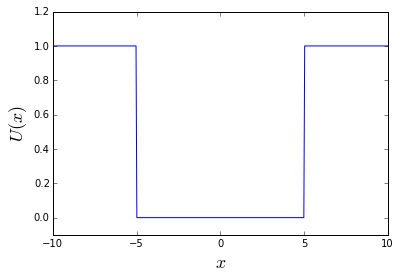

In [694]:
fig, ax=plt.subplots()

ax.plot(x,U)

ax.set_ylim(-.1,Vo*1.2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

# Theory

Above we see what the potential looks like. Pretty much like we promissed--square and finite. As we will see, the depth and width of this potential will tell us how many solutions we can expect.

As we do for potentials, we find solutions inside and outside the potential and we "stitch" the answers together via the boundary conditions.

The Schrodinger Equation for inside of the well, where $V(x)=0$ is given by

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}=E\psi \text{ for } -L/2\leq x\leq L/2.
$$

We can simplify the notation by introducing the wavenumber $k=\sqrt{\frac{2mE}{\hbar^2}}$ and Schrodinger's Equation becomes

$$
\frac{d^2\psi}{dx^2}+k^2\psi=0
$$

Outside the well, where $V(x)=V_o$, we have:

$$
\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V_o\psi=E\psi, \text{ for } |x| \geq L/2 
$$

We can once again make a simplification by introducing the decay constant (the reason for this identifcation will become clear later) $$\kappa=\left(\frac{2m(V_o-E}{\hbar^2}\right)^{1/2}$$ In the range of $x$ we are considering in this part of the derivation, $V_o-E$ is always positive and $\kappa$ is real. Schrodinger's Equation becomes
$$ \frac{d^2\psi}{dx^2}-k^2\psi=0$$

For now we will only consider the bound solutions, so for the region inside of the well, we can see by inspection that the solutions separate into even and odd solutions. That is solutions that obey even and odd symmetry across $x=0$ (If we had shifted the well with respect to the origin, we would have gotten the same energies, but the solutions wouldn't be separated so nicely).

##Even solutions

By inspection we see that a bound solution to the Schrodinger Equation inside of the well is
$$ \psi(x)=A\cos(kx), -L/2 \leq x \leq L/2$$

and the solution outside of the well is

$$\psi(x)=B\e^{\mp\kappa x}$$ where the minus sign is for $x>L/2$ and the plus sign is for $x<L/2$. These choices of sign will ensure we can normalize the final wavefunction.

We now use the boundary conditions to get the energies of the bound states. 

The wavefunction needs to be continuous at $x=L/2$ which leads to:
$$ A\cos(kL/2)=Be^{-\kappa L/2}$$

The first derivative of the wavefunction also needs to be continuous at $x=L/2$
$$ -Ak\sin(kL/2)=-B\kappa e^{-\kappa L/2}$$

Dividing these two equations will eliminate the constants and we get

$$\tan(kL/2)=\frac{\kappa}{k}$$

Replacing $\kappa$ on the RHS

$$\tan(kL/2)=\sqrt{\frac{2mV_o}{\hbar^2 k^2}-\frac{2mE}{\hbar^2 k^2}}$$

and now replacing $k$ on the RHS

$$\tan(kL/2)=\sqrt{\frac{2mV_o}{\hbar^2 k^2}-1}$$

We now want to solve for $k$ to get the energy, however, this is a trancedental equation and can't be solved explicitly! So let's make two changes of variable to make the notation simpler. $\theta=kL/2$ and $\theta_0=\frac{mV_oL^2}{2\hbar^2}$ With that the trancedental equation becomes:

$$\tan\theta=\sqrt{\frac{\theta_o^2}{\theta^2}-1}$$

We will solve this in two ways: 1) plotting the LHS of the above equation and the RHS of the equation as functions of $\theta$. Where these cross are the solutions we are looking for.

##Odd solutions
Before continuing, let us state the odd solutions inside of the well.
$$ \psi(x)=A\sin(kx), -L/2 \leq x \leq L/2$$
The solutions outside of the well are similar and imposing the boundary conditions as before leads to the following trancedental equation:
$$-\cot\theta=\sqrt{\frac{\theta_o^2}{\theta^2}-1}$$






In [738]:
#Given our physical parameters above, calculate theta_o
theta0=sqrt(m*9.31e-31*Vo*L*L/(2*(6.58e-16)**2*1e18*1.6e-19))

#Graphical Method

As was written above, a fairly quick way on a computer to solve for $\theta$ is to plot the LHS and the RHS of the solutions on the same graph. Where the graphs intersect are solutions to the problem. By zooming in on the graph, it is easy to get a fairly quick and accurate set of solutions.

In [752]:
def squareWellGraphicalSolution(t0=theta0):
    """
    
    """
    utol=10        #utol and ltol are upper and lower limits to avoid the discontinuities
    ltol=-10       #of tan and cot
    
    theta=linspace(0.001,1.05*t0,400)
    
    fig, axes = plt.subplots(1, 1)
    y1=tan(theta)
    y2=-1/tan(theta)
   
    y=sqrt((t0/theta)**2-1)
    #replace all numbers greater or less than utol and ltol with NotANumber(nan) so 
    #they don't show up in the graph
    y2[y2>utol] = nan
    y2[y2<ltol] = -nan
    y1[y1>utol] = nan
    y1[y1<ltol] = -nan
    y[y>utol] = nan
    y[y<ltol] = -nan
    
    axes.plot(theta,y,label=r'$\sqrt{\frac{\theta_0^2}{\theta^2}-1}$')
    axes.axvline(t0)
    axes.plot(theta,y1,label='Even')
    axes.plot(theta,y2,label='Odd')
    axes.legend()
    axes.set_ylim(-1,10)
    return theta0

Below you can change the slider to different values of $\theta_o$. One thing to notice is that no matter how small $\theta_o$ there is always one even, bound solution. There does not have to be an odd solution as well. What does it mean to decrease $\theta_o$? $\theta_o$ gets smaller when the well gets shallower ($V_o$ decreases) or narrower ($L$ decreases). As $\theta_o$ gets smaller fewer and fewer states exist, but as we wrote, there is always one that remains no matter how small $\theta_o$ gets.

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in less


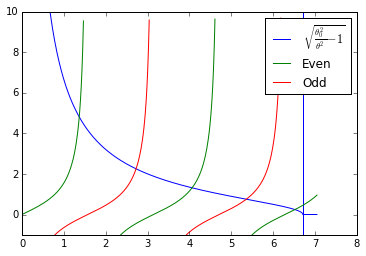

In [753]:
y=interactive(squareWellGraphicalSolution,theta0=(.01,10))
display(y)


In [697]:
def even_sol(x,theta0):
    #theta0=5.71
    y1=tan(x)   
    
    y=sqrt((theta0/x)**2-1)
    return(y-y1)
def odd_sol(x,theta0):
    #theta0=5.71 
    y2=-1/tan(x)
    y=sqrt((theta0/x)**2-1)
    return(y-y2)

In [698]:
def sqWellSol(theta0,step):
    esol=array([],dtype=float)
    osol=array([],dtype=float)
    inc=arange(step,theta0,step)
    
    even=True
    for i in range(len(inc)-1):
        if even==True:
            if even_sol(inc[i],theta0)*even_sol(inc[i+1],theta0)<0:
                
                temp=optimize.brentq(even_sol,inc[i],inc[i+1],args=theta0)
                
                esol=append(esol,temp)
                even=False
        if even==False:
            if odd_sol(inc[i],theta0)*odd_sol(inc[i+1],theta0)<0:
                
                temp1=optimize.brentq(odd_sol,inc[i],inc[i+1],args=theta0)
                osol=append(osol,temp1)
                
                even=True
    
    #odd1=optimize.brentq(odd_sol, 2.5,2.7,args=(theta0))
    return esol,osol



In [718]:
etheta,otheta=sqWellSol(theta0,.1)

ek=etheta*2./L #in nm^-1
ok=otheta*2/L
ekap=2*etheta/L*tan(etheta)
okap=abs(2*otheta/L*tan(otheta))
e_eng=2*(1.05457173e-34)**2*etheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19
o_eng=2*(1.05457173e-34)**2*otheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19
print e_eng,o_eng

[ 0.04157367  0.36774241  0.94768751] [ 0.16532131  0.63986274]


In [736]:
def even_wave(x,Vo,ek,ekap,L):
    A=Vo/20.
    B=A*(cos(ek*L/2))/exp(-ekap*L/2)
    
    wave=zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2:
            wave[i]=B*exp(ekap*x[i])
        elif x[i]>=L/2:
            wave[i]=B*exp(-ekap*x[i])
        else:
            wave[i]=A*cos(ek*x[i])
    return wave

def odd_wave(x,Vo,ok,okap,L):
    A=Vo/20.
    B=A*(sin(ok*L/2))/exp(-okap*L/2)
    
    wave=zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2:
            wave[i]=B*exp(okap*x[i])
        elif x[i]>=L/2:
            wave[i]=-B*exp(-okap*x[i])
        else:
            wave[i]=-A*sin(ok*x[i])
    return wave

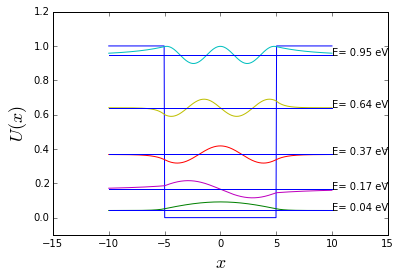

In [737]:
fig, ax=plt.subplots()

ax.plot(x,U)
for i in range(len(ek)):
    ax.plot(x,e_eng[i]+even_wave(x,Vo,ek[i],ekap[i],L))
    ax.axhline(y=e_eng[i],xmin=.1666, xmax=.8333)
    ax.annotate('E= %3.2f eV'%e_eng[i], xy=(x[-1],e_eng[i] ),  xycoords='data')
for i in range(len(ok)):
    ax.plot(x,o_eng[i]+odd_wave(x,Vo,ok[i],okap[i],L))
    ax.axhline(y=o_eng[i],xmin=.1666, xmax=.8333)
    ax.annotate('E= %3.2f eV'%o_eng[i], xy=(x[-1],o_eng[i] ),  xycoords='data')
    
ax.set_ylim(-.1*Vo,Vo*1.2)
ax.set_xlim(-3*L/2,3*L/2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

In [735]:
cos(etheta[0])

0.20355368040126423

In [534]:
cos(5*ek[0])/exp(-5*ekap[0])

10.68074349071826

In [531]:
exp(-5*ekap[0])

0.031325808601338753